In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [222]:
df = pd.read_csv('clinvar_conflicting.csv')
df.head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_6032\4113085049.py:1: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clinvar_conflicting.csv')


,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
5,1,2160554,G,C,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.700,4.079099,-2.0
6,1,3328358,T,C,0.0000,0.00000,0.0000,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.101,0.172,-0.543433,-1.0
7,1,3328659,C,T,0.1523,0.13103,0.1060,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.101,23.000,3.424422,-3.0
8,1,3347452,G,A,0.0000,0.00357,0.0030,"MedGen:C3809288,OMIM:615373|MedGen:CN169374|Me...",NaN,Left_ventricular_noncompaction_8|not_specified...,...,NaN,NaN,NaN,NaN,NaN,NaN,0.101,11.360,1.126629,1.0
9,1,5925304,G,A,0.0045,0.00231,0.0058,"MedGen:C0687120,Orphanet:ORPHA655,SNOMED_CT:20...",NaN,Nephronophthisis|not_specified,...,deleterious,benign,NaN,NaN,NaN,NaN,0.021,22.100,2.969650,-1.0


In [223]:
df.tail(10)

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
65178,X,154005088,C,CAAG,0.0000,0.00000,0.0000,"MedGen:C0265965,Orphanet:ORPHA1775,SNOMED_CT:7...",NaN,Dyskeratosis_congenita|not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.500,1.716666,NaN
65179,X,154005088,CAAG,C,0.0000,0.00000,0.0000,"MedGen:C0265965,Orphanet:ORPHA1775,SNOMED_CT:7...",NaN,Dyskeratosis_congenita|not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.300,2.014044,NaN
65180,X,154005148,G,A,0.0708,0.17233,0.1383,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.255,0.359695,NaN
65181,X,154065843,G,A,0.0159,0.00689,0.0127,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",...,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,3.007,0.042639,NaN
65182,X,154157565,C,T,0.0153,0.00473,0.0140,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",...,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,11.440,1.142527,NaN
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"MedGen:C0019069,OMIM:306700,SNOMED_CT:28293008...",NaN,Hereditary_factor_VIII_deficiency_disease|not_...,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,C,T,0.0020,0.00060,0.0013,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",...,tolerated,benign,NaN,NaN,NaN,NaN,0.00158,0.002,-1.731470,3.0
65185,X,154194886,C,T,0.0125,0.00370,0.0111,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",...,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,12.850,1.412434,NaN
65186,X,154490187,T,C,0.0003,0.00034,0.0000,"MedGen:C3501611,Orphanet:ORPHA777|MedGen:CN169374",NaN,Non-syndromic_X-linked_intellectual_disability...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130,-0.592415,NaN
65187,X,154508542,G,C,0.0019,0.00267,0.0008,MedGen:CN169374|MedGen:CN517202,NaN,not_specified|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,0.14000,0.046,-0.786513,-1.0


In [224]:
# df.dropna(inplace=True)

In [225]:
# df.isnull().sum()

In [226]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().sum().count()).sort_values(ascending=False)
missing_data= pd.concat([total,percent],axis=1,keys=['TOTAL_MISSING','PERCENTAGE_RATE'])
missing_data

,TOTAL_MISSING,PERCENTAGE_RATE
MOTIF_SCORE_CHANGE,65186,1417.086957
HIGH_INF_POS,65186,1417.086957
MOTIF_POS,65186,1417.086957
MOTIF_NAME,65186,1417.086957
DISTANCE,65080,1414.782609
SSR,65058,1414.304348
CLNSIGINCL,65021,1413.500000
CLNDISDBINCL,65021,1413.500000
CLNDNINCL,65021,1413.500000
INTRON,56385,1225.760870


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

In [228]:
df['CHROM'].replace({'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10, '11':11, '12':12,'13':13, '14':14, '15':15, '16':16, '17':17, 
'18':18, '19':19, '20':20, '21':21, 
'22':22, 'X':23,'11':24, '12':25, '13':26, '14':27, '15':28, '16':29, '17':30, '18':31, '19':32, '2':33, '20':34, '21':35, '22':35, '3':37, 'MT':38},inplace=True)


In [249]:
# df['CLNDN'].unique()

array([8960, 8388, 8449, ..., 2345, 2362, 9085], dtype=int64)

In [255]:
cat_veriable = ['POS','REF','ALT','AF_ESP','AF_EXAC','AF_TGP','CLNDISDB','CLNDISDBINCL','CLNDN','CLNDNINCL','CLNHGVS','CLNSIGINCL','CLNVC','CLNVI','MC','SSR','Allele',
'Consequence','IMPACT','SYMBOL','Feature_type','Feature','BIOTYPE','EXON','INTRON','cDNA_position','CDS_position','Protein_position','Amino_acids','Codons',
'DISTANCE','STRAND','BAM_EDIT','SIFT','PolyPhen','MOTIF_NAME','MOTIF_POS','MOTIF_SCORE_CHANGE','HIGH_INF_POS','LoFtool','CADD_PHRED','CADD_RAW','BLOSUM62']
enc = LabelEncoder()
for col in cat_veriable:
    df[col] = enc.fit_transform(df[col])

In [256]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,563,437,106,753,3904,614,8866,93,8960,...,2,0,2,1,1,2,1195,978,6821,4
1,1,1013,437,0,0,0,0,6615,93,8388,...,1,0,2,1,1,2,1195,9278,57476,0
2,1,1096,0,213,0,1,0,750,93,8449,...,0,2,2,1,1,2,1195,9258,55436,2
3,1,1931,437,0,0,0,0,5993,93,8156,...,4,4,2,1,1,2,1195,9202,42538,6
4,1,1931,437,335,0,0,0,5989,93,8154,...,4,4,2,1,1,2,1195,9224,49374,0


In [257]:
df.tail()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
65183,23,55353,644,213,782,4394,876,3195,93,3915,...,4,4,2,1,1,2,16,104,3588,6
65184,23,55356,224,335,20,60,10,8932,93,9085,...,2,0,2,1,1,2,16,1,687,5
65185,23,55361,224,335,125,370,79,8932,93,9085,...,4,4,2,1,1,2,16,8462,29097,6
65186,23,55366,644,106,3,34,0,8221,93,6683,...,4,4,2,1,1,2,1195,129,3807,6
65187,23,55367,437,106,19,267,6,9156,93,9253,...,4,4,2,1,1,2,514,45,2827,2


In [258]:
df.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB',
       'CLNDISDBINCL', 'CLNDN', 'CLNDNINCL', 'CLNHGVS', 'CLNSIGINCL', 'CLNVC',
       'CLNVI', 'MC', 'ORIGIN', 'SSR', 'CLASS', 'Allele', 'Consequence',
       'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE', 'EXON',
       'INTRON', 'cDNA_position', 'CDS_position', 'Protein_position',
       'Amino_acids', 'Codons', 'DISTANCE', 'STRAND', 'BAM_EDIT', 'SIFT',
       'PolyPhen', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS',
       'MOTIF_SCORE_CHANGE', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'BLOSUM62'],
      dtype='object')

In [289]:
x = df.drop('SIFT',axis=1)
y = df['SIFT']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [290]:
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [291]:
pred1 = model1.predict(x_test)
pred1

array([4, 2, 0, ..., 4, 4, 4], dtype=int64)

In [292]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2325
           1       0.82      0.09      0.17       150
           2       0.75      0.84      0.79      2287
           3       0.86      0.14      0.24       226
           4       1.00      1.00      1.00      8050

    accuracy                           0.92     13038
   macro avg       0.85      0.58      0.60     13038
weighted avg       0.92      0.92      0.91     13038



AxesSubplot(0.125,0.125;0.62x0.755)


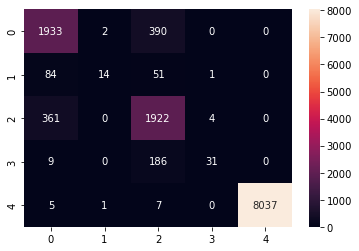

In [293]:
print(sns.heatmap(confusion_matrix(y_test,pred1),annot =True,fmt='0.5g'))

In [318]:
model2 =DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [319]:
pred2 = model2.predict(x_test)
pred2

array([4, 2, 2, ..., 4, 4, 4], dtype=int64)

In [320]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      2325
           1       0.14      0.17      0.16       150
           2       0.72      0.74      0.73      2287
           3       0.34      0.31      0.33       226
           4       1.00      1.00      1.00      8050

    accuracy                           0.88     13038
   macro avg       0.59      0.59      0.59     13038
weighted avg       0.89      0.88      0.89     13038



AxesSubplot(0.125,0.125;0.62x0.755)


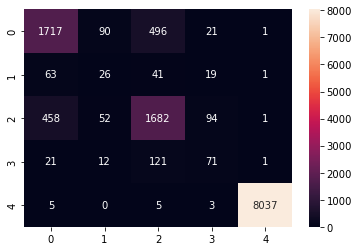

In [321]:
print(sns.heatmap(confusion_matrix(y_test,pred2),annot =True,fmt='0.5g'))

In [322]:
MPLMODEL = MLPClassifier(solver = 'adam',hidden_layer_sizes=(100,),activation='logistic')
MPLMODEL.fit(x_train,y_train)

MLPClassifier(activation='logistic')

In [323]:
mlppred1 = MPLMODEL.predict(x_test)
mlppred1

array([4, 4, 4, ..., 0, 0, 0], dtype=int64)

e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.44      0.64      0.52      2325
           1       0.00      0.00      0.00       150
           2       0.49      0.02      0.04      2287
           3       0.00      0.00      0.00       226
           4       0.71      0.84      0.77      8050

    accuracy                           0.63     13038
   macro avg       0.33      0.30      0.26     13038
weighted avg       0.60      0.63      0.57     13038

AxesSubplot(0.125,0.125;0.62x0.755)


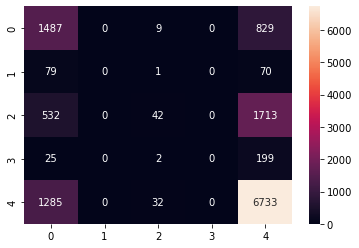

In [324]:
print(classification_report(y_test,mlppred1))
print(sns.heatmap(confusion_matrix(y_test,mlppred1),annot =True,fmt='0.5g'))